# TODO
* Change into snake case.
* Add more comments

# Style

# Importing and functions

## Resetting and running command line things

In [1]:
%reset -f

!pip install pandas

## Importing (standard) modules

In [2]:
# Data/vector handeling and extra math
import numpy as np
import pandas as pd
import math

# Optimisation
import scipy
from scipy import optimize
import sklearn.metrics as metrics

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Error handeling
import warnings

# Time
import time
import datetime

# System/file interaction
import os
import pickle# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/
import shelve# https://stackoverflow.com/questions/2960864/how-to-save-all-the-variables-in-the-current-python-session

## Importing from file

In [3]:
from helpers import *
from exampleHelpers import *

## Defining (lambda) functions

In [4]:
exampleRealFunction = lambda x: np.exp(x)/10 + x**2 + np.sqrt(x)# https://realpython.com/python-lambda/

def thirdOrderPolynomial(x, a: float, b: float, c=2, d=1):
    """
    A third order polynomial function.
    
    This is the function that is going to be fitted with the data.
    """
    first_part = a + b*x
    second_part = c*x**2 + d*x**3
    return first_part + second_part

# Example of data importing, fitting, filtering and plotting

## (Online) data importing, subplots and figure display/saving

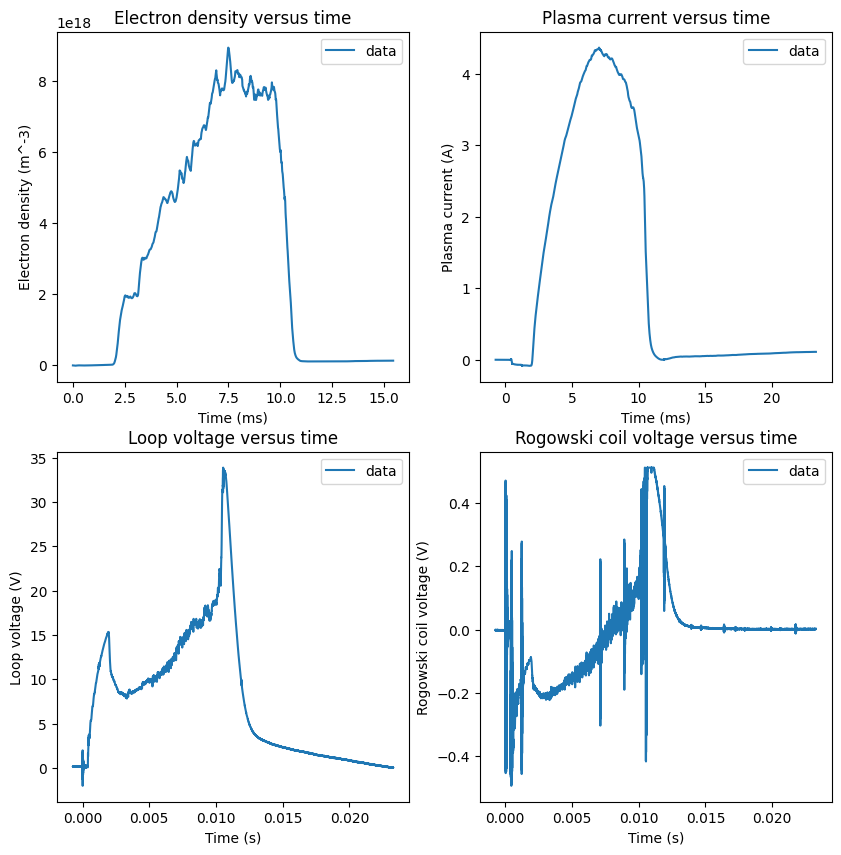

In [5]:
## Importing data
shot_no = 41299

"""import requests
t_CD = requests.get('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Production/Parameters/Tcd')# Time curren drive
t_CD = float(t_CD.content) * 1e-6  # from us to s"""

### From file via numpy.
"""
data = np.genfromtxt(filename, skip_header=2, delimiter =  ",")
x = data[:,0]
y = data[:,1]#"""

### From file via pandas
"""
data = pd.read_csv("Spectrum.txt", delimiter="\t")
print(data.describe(), data.columns)
x = data[data.columns[0]]
y = data["Intensity"]#"""

### From internet pandas
ne_lav = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/Interferometry/LukLob/ne_lav.csv', header=None)
Ip = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/Basic/Results/Ip.csv', header=None)
U_Loop = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_Loop.csv', header=None)
U_RogCoil = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_RogCoil.csv', header=None)

## Plotting data
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = (10,10))# Make an plot with multiple subfigures

ax1.plot(ne_lav[0], ne_lav[1], label="data")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Electron density (m^-3)")
ax1.set_title("Electron density versus time")
ax1.legend()

ax2.plot(Ip[0], Ip[1], label="data")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Plasma current (A)")
ax2.set_title("Plasma current versus time")
ax2.legend()

ax3.plot(U_Loop[0], U_Loop[1], label="data")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Loop voltage (V)")
ax3.set_title("Loop voltage versus time")
ax3.legend()

ax4.plot(U_RogCoil[0], U_RogCoil[1], label="data")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Rogowski coil voltage (V)")
ax4.set_title("Rogowski coil voltage versus time")
ax4.legend()

plt.show()

## Saving and deleting

In [6]:
## Figure
fig.savefig('ExampleSubfigures.pdf', dpi=1200)# resolution = figsize*dpi#, format='eps'

## Pickle a single variable
if not os.path.isdir("temp"):
    os.makedirs("temp")

with open("temp/pickle_file.pickle", "wb") as file:
    pickle.dump(Ip, file)

with open("temp/pickle_file.pickle", "rb") as file:
    Ip = pickle.load(file)
#print(IpFromPickle)

## Shelving
myShelve = shelve.open("temp/shelve_file", "n")
for key in dir():
    try:
        myShelve[key] = globals()[key]
    except:
        # Doesn't save everything, but most variables are saved.
        print('ERROR shelving: {0}'.format(key))
myShelve.close()

my_shelf = shelve.open("temp/shelve_file")
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print('(Limited) ERROR unshelving: {0}'.format(key))
my_shelf.close()

## Deleting files
os.remove('ExampleSubfigures.pdf')
os.remove("temp/pickle_file.pickle")
os.remove("temp/shelve_file.bak")
os.remove("temp/shelve_file.dat")
os.remove("temp/shelve_file.dir")
os.rmdir("temp")

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: datetime
ERROR shelving: exampleRealFunction
ERROR shelving: exit
ERROR shelving: file
ERROR shelving: get_ipython
ERROR shelving: math
ERROR shelving: metrics
ERROR shelving: np
ERROR shelving: open
ERROR shelving: optimize
ERROR shelving: os
ERROR shelving: pd
ERROR shelving: pickle
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: sns
ERROR shelving: time
ERROR shelving: warnings


## Example polynomial fitting and random data generation

Selected order: order 9 of 20 , MAPE: 12.984546589416679 , minimum MAPE: 12.154179370497385
Coefficients: [-1.56990249e+01  9.24303372e+01 -1.74315299e+02  1.61245793e+02
 -8.17023504e+01  2.44070454e+01 -4.39647038e+00  4.69118809e-01
 -2.72984630e-02  6.69687202e-04]


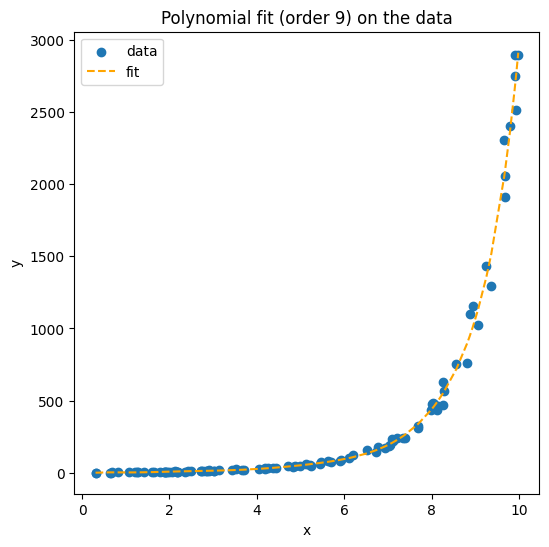

Selected order: order 4 of 4 , MAPE: 10.401254928173268 , minimum MAPE: 10.401254928173268
Coefficients: [-0.04324006  0.93807826  0.09759803 -0.11253037 -0.01726459]


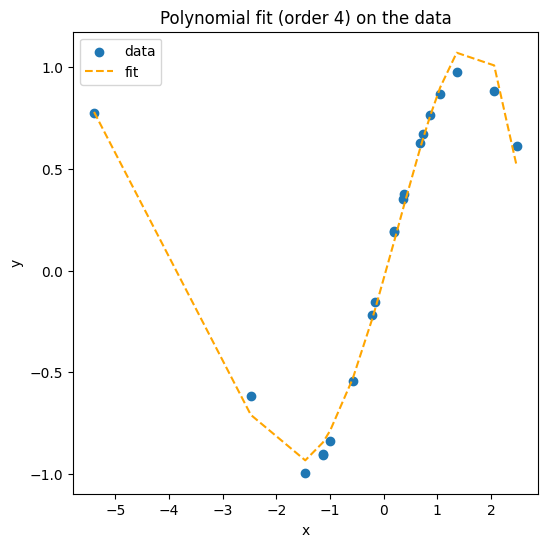

In [7]:
variation = 0.2

## Constantly space stuff.
#x = np.linspace(1, 10, num=100+1)#, endpoint=False)# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
#x = np.logspace(2, 10, num=8+1)# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

# Randomly spaced stuff.
x = np.sort((10 * np.random.rand(100)))# 100 random points between 0 and 10
#x = np.sort(np.random.randint(0, 10, size=100))# 100 random intergers between 0 and 10.
y = exampleRealFunction(x) * ((2*np.random.rand(len(x))*variation + 1))# Add random variation to y data guaranteed to be in a certain range.

coefficients, MAPE = makePolynomialFit(x, y, True)

x = np.sort(np.random.normal(loc=0, scale=2, size=20))#20 random points of a Gaussian distribution with a mean of 0 and std of 2.
y = np.sin(x)
coefficients, MAPE = makePolynomialFit(x, y, True)

## Data importing, fitting/filtering, scatter/line plot, finding a specific data point/index

Theoretical minimum MAPE: 10.436109025203322
Fit parameters: [-2.58509333  5.58543951 -1.46259053  0.42848767] with standard deviation [2.24261684 2.64418679 0.94464647 0.10429627]
RMSE =  2.191956997916926 , MAPE = 10.251337051809287 , MAE = 1.5783792384161002 , MSE = 4.804675480716984 , R2 = 0.9636834607532636


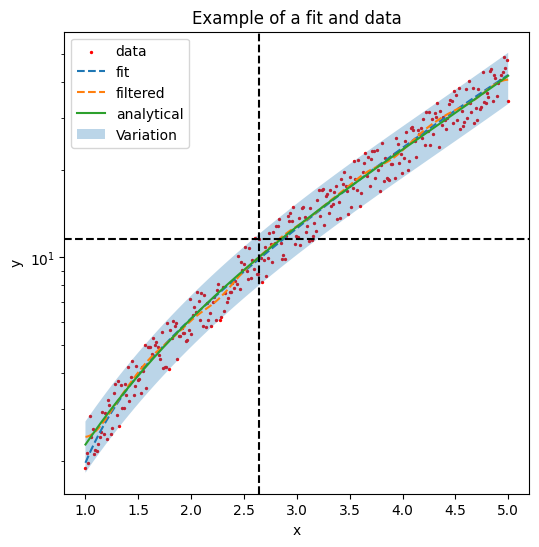

In [8]:
## Generating/getting data
### From function
amountOfDatapoints = 300
variation = 0.2

x = np.linspace(1, 5, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data
print("Theoretical minimum MAPE:", 100*metrics.mean_absolute_percentage_error(y, exampleRealFunction(x)))

## Fitting data
startingParameters = [-10, 15, -5, 1]# Optional starting values of the parameters
popt, pcov = optimize.curve_fit(thirdOrderPolynomial, x, y, startingParameters)# Make the fit.

fit = thirdOrderPolynomial(x, *popt)# Get the results of the fit.
print("Fit parameters:", popt, "with standard deviation", np.sqrt(np.diag(pcov)))
print("RMSE = ", metrics.mean_squared_error(y, fit, squared=False), ", MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit), ", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Filtering data
y_filter = scipy.ndimage.gaussian_filter(y, 10)# Apply a Gaussian filter (like time averaging) to smooth the curve.

x_interpolation = np.linspace(1, 5, num=5*amountOfDatapoints)
y_interpolation = np.interp(x_interpolation, x, y_filter)

## Get the index of where y=10
y_goal = 10
index = (np.abs(y_filter - y_goal)).argmin()

## Ploting data
fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
ax.plot(x, fit, linestyle="--", label="fit")
ax.plot(x, y_filter, linestyle="--", label="filtered")
ax.plot(x, exampleRealFunction(x), label="analytical")
ax.fill_between(x, exampleRealFunction(x)*(1+variation), exampleRealFunction(x)*(1-variation), alpha=0.3, label="Variation")
ax.axvline(x[index], color="k", linestyle="--")
ax.axhline(y[index], color="k", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_yscale('log')
ax.set_title("Example of a fit and data")
ax.legend()
plt.show()

## Heatmap and contour plot example

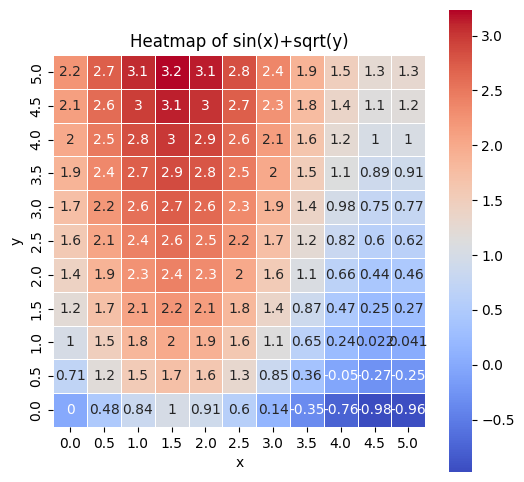

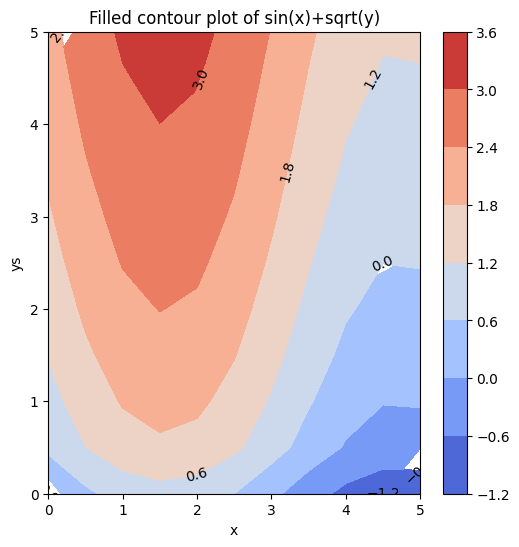

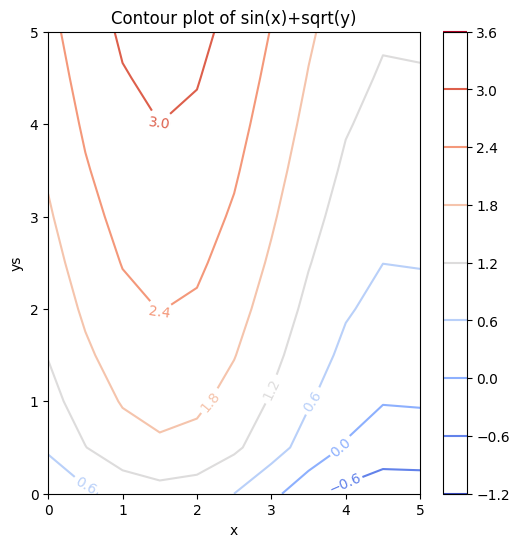

In [9]:
x = []
y = []
z = []

for i in np.linspace(0, 5, num=11):
    for j in np.linspace(0, 5, num=11):
        x.append(i)
        y.append(j)
        z.append(np.sin(i)+np.sqrt(j))

## Plotting
xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.heatmap(pdDataframe, ax=ax, cmap="coolwarm", linewidths=.5, annot=True, square=True)
ax.invert_yaxis()
#ax.xaxis.tick_top()
ax.set_title("Heatmap of sin(x)+sqrt(y)")
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contourf(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10, colors=['black' for l in CS.levels])
ax.set_title("Filled contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contour(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10)
ax.set_title("Contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

# Machine learning

## Neural Network

In [10]:
import torch
torch.cuda.is_available()# Jammer ;(

#TODO

False

## Guassian procces

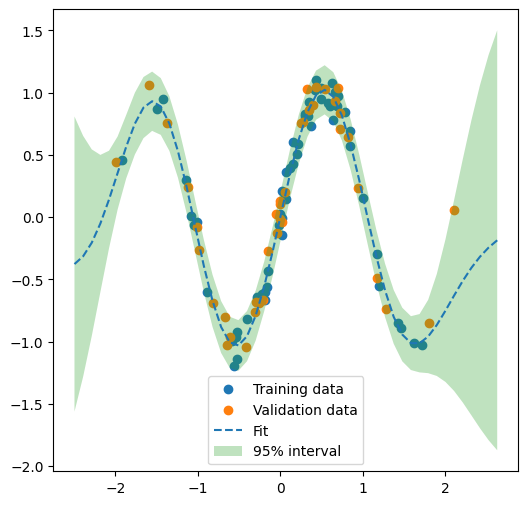

Training error: {'RMSE': 0.08839858107834522, 'MAPE': 57.899911869009316, 'MAE': 0.07231886928865629, 'MSE': 0.007814309136664775, 'R2': 0.9849196893746881}
Validation error: {'RMSE': 0.14387652812788174, 'MAPE': 72.85494850343015, 'MAE': 0.09091878850639284, 'MSE': 0.020700455346133146, 'R2': 0.956552447374096}


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, PairwiseKernel, WhiteKernel
from sklearn.model_selection import train_test_split

N = 100
noise = 0.1
f0 = lambda x: np.sin(3*x)
x = np.random.normal(loc=0, scale=0.8, size=N)
y = f0(x) + noise*np.random.normal(loc=0,scale=0.9,size=x.shape)


ker = RBF(length_scale=1) + WhiteKernel(noise_level=1.0)#, Matern, RationalQuadratic, ExpSineSquared
regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.4, make_plot=True)

#ker = ExpSineSquared(length_scale=1) + WhiteKernel(noise_level=1.0)
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared() + RBF() + WhiteKernel()
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)


# Performance and updates

## Progress bar

In [12]:
startTime = time.time()
last_update = 0# This zero is needed to ensure the first update works.

for i in range(0,1001,5):
    random_function(i/5000)
    last_update = update_progress(i/1000, bar_length=50, start_time=startTime, message="This is an message", last_update_time=last_update, refresh_rate=1/3)

endTime = time.time()
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [##################################################] 100.0% | 4.95 %/sec | 0.0 sec remaining | This is an message                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Simulation took: 20.18395709991455 seconds.


In [13]:
startTime = time.time()
determined_pi = calculate_pi_monte_carlo(3*10**6, progress=True)
endTime = time.time()

print(determined_pi)
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [##################################################] 100.0% | 10.05 %/sec | 0.0 sec remaining | Current pi: [3.142982952339016, 3000000]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3.142982952339016
Simulation took: 10.011231422424316 seconds.


In [14]:
%timeit random_function(s = math.floor(np.pi*10**5))

The slowest run took 16.87 times longer than the fastest. This could mean that an intermediate result is being cached.
2.08 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%prun calculate_pi_monte_carlo(10**6)

         8 function calls in 2.115 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.103    2.103    2.114    2.114 exampleHelpers.py:46(calculate_pi_monte_carlo)
        2    0.011    0.005    0.011    0.005 {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
        1    0.001    0.001    2.114    2.114 <string>:1(<module>)
        1    0.000    0.000    2.115    2.115 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 {built-in method time.time}

## Multi processing/threading

https://medium.com/@grvsinghal/speed-up-your-python-code-using-multiprocessing-on-windows-and-jupyter-or-ipython-2714b49d6fac

When using Jupyter only pool works (with the certain fix). In that case the method that is being excecuted needs to be imported from a seperate file (and can't be defined in the Jupyter file itself).

https://www.pythontutorial.net/python-concurrency/python-multiprocessing/

https://superfastpython.com/multiprocessing-in-python/#Tip_5_Use_Pipes_and_Queues

Using processes:

In [16]:
# Dit werkt allemaal niet helemaal lekker binnen Jupyter. Gebruik in plaats daarvan pooling
"""
from multiprocessing import Process, Queue

def calculate_pi_monte_carlo_queue(queue, samples, progress=False):
    #From a procces you can return a variable using a que. So you need to make a new function where the retun is put into the queue
    queue.put(calculate_pi_monte_carlo(samples, progress))


samples_number = [10**i for i in range(1,8)]

processes = []
queue = Queue()
for i in samples_number:
    processes.append(Process(target=calculate_pi_monte_carlo_queue, args=(queue, i, True)))

print("Created all the processes.")

for process in processes:
    process.start()
    
print("Started all the processes.")

#for process in processes:
#    process.join()

print("Finished all the processes.")

results = []
for i in range(len(processes)):
    results.append(queue.get())
    print(results)
    # This could also be transformed into a pd dataframe using pd.concat(results, , ignore_index = True, sort = False))

print("Got results from all the processes.")

print()
print(sample_number)
print(results)
"""


'\nfrom multiprocessing import Process, Queue\n\ndef calculate_pi_monte_carlo_queue(queue, samples, progress=False):\n    #From a procces you can return a variable using a que. So you need to make a new function where the retun is put into the queue\n    queue.put(calculate_pi_monte_carlo(samples, progress))\n\n\nsamples_number = [10**i for i in range(1,8)]\n\nprocesses = []\nqueue = Queue()\nfor i in samples_number:\n    processes.append(Process(target=calculate_pi_monte_carlo_queue, args=(queue, i, True)))\n\nprint("Created all the processes.")\n\nfor process in processes:\n    process.start()\n    \nprint("Started all the processes.")\n\n#for process in processes:\n#    process.join()\n\nprint("Finished all the processes.")\n\nresults = []\nfor i in range(len(processes)):\n    results.append(queue.get())\n    print(results)\n    # This could also be transformed into a pd dataframe using pd.concat(results, , ignore_index = True, sort = False))\n\nprint("Got results from all the proce

Using pools:

In [17]:
from multiprocessing import Pool

samples_number = [10**i for i in range(1,8)]
start_time = time.time()


if __name__ ==  '__main__':
    __spec__ = "ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)"# Only needed for Jupyter https://stackoverflow.com/questions/45720153/python-multiprocessing-error-attributeerror-module-main-has-no-attribute

    with Pool() as pool:
        results = pool.map(calculate_pi_monte_carlo, samples_number)# For single inputs
    

print("Input:", samples_number)
print("Output:", results)
print("Computation time:", time.time()-start_time)

Input: [10, 100, 1000, 10000, 100000, 1000000, 10000000]
Output: [3.272727272727273, 3.089108910891089, 3.1768231768231767, 3.122887711228877, 3.145568544314557, 3.1422808577191423, 3.1409216859078315]
Computation time: 24.164594173431396


In [18]:
from multiprocessing import Pool

samples_number = np.random.randint(1, 10, size=10)
input = [(i, i) for i in samples_number]# Create an list of inputs.
start_time = time.time()


if __name__ ==  '__main__':
    __spec__ = "ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)"# Only needed for Jupyter https://stackoverflow.com/questions/45720153/python-multiprocessing-error-attributeerror-module-main-has-no-attribute

    with Pool() as pool:
        results = pool.starmap(random_function, input)# https://superfastpython.com/multiprocessing-pool-map-multiple-arguments/
    

print("Input:", samples_number)
print("Output:", results)
print("Expected computation time:", np.sum(samples_number), "Real achieved computation time:", time.time()-start_time, "Minimum possible time:", max(samples_number))

Input: [9 7 2 7 3 6 7 6 7 9]
Output: [18, 14, 4, 14, 6, 12, 14, 12, 14, 18]
Expected computation time: 63 Real achieved computation time: 14.404477834701538 Minimum possible time: 9
